In [47]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

import env
import os
import wrangle as w
import explore as e

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()

this file exists, reading from csv


In [3]:
df = df.rename(columns={'bedroomcnt':'bedrooms',
                       'bathroomcnt':'bathrooms',
                       'calculatedfinishedsquarefeet':'area',
                       'taxvaluedollarcnt':'salesamount',
                       'fips':'county'})

In [4]:
df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

In [5]:
df.head()

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [6]:
train, validate, test = w.splitting_data(df)

In [7]:
train.shape, validate.shape, test.shape

((1284141, 7), (428047, 7), (428047, 7))

In [26]:
train.dtypes

bedrooms         int64
bathrooms      float64
area             int64
salesamount      int64
yearbuilt        int64
taxamount      float64
county          object
dtype: object

In [28]:
train_scaled = train.copy()

In [29]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'salesamount', 'yearbuilt',
       'taxamount', 'county'],
      dtype='object')

In [11]:
train.sample(5)

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
975990,3,2.0,1260,227196,1977,4306.00,LA
300779,4,3.0,2353,445506,1980,4609.12,Orange
1931989,2,2.0,1332,416667,1949,5166.43,LA
1601412,3,2.0,1990,383006,1962,4553.74,Orange
1755340,3,2.0,1806,370731,1912,4430.32,Ventura


In [18]:
X_train, X_test = train[['salesamount', 'taxamount']], test[['salesamount', 'taxamount']]
y_train, y_test = train.salesamount, test.salesamount

In [21]:
# model steps for KNN?
# make it!
model = KNeighborsClassifier(8)
# fit the model!
model.fit(X_train, y_train)
# use it!
model.score(X_test, y_test)

0.18961702803664085

<Axes: xlabel='county'>

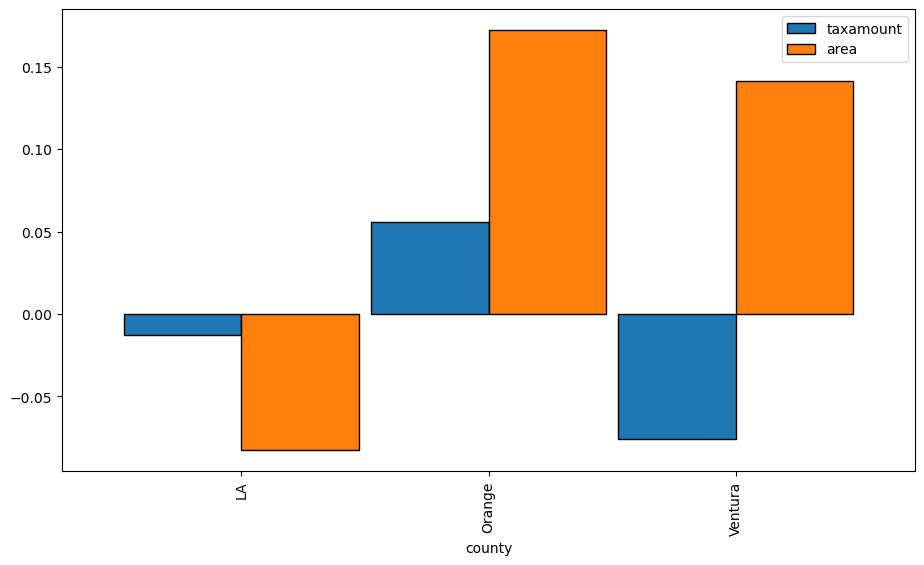

In [31]:

# cols = ['bedrooms', 'bathrooms', 'taxamount', 'area']
# scaler = StandardScaler()
# train[cols] = scaler.fit_transform(train[cols])
# train[['county', 'taxamount', 'area']].groupby('county').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)

In [24]:
# create three different scalers,
# transform the original versions of the columns:
# ['x1', 'x2']
# pop those numpy values from the transformations into new columns:
# that are labeled appropriately
# scaler = MinMaxScaler()
# X_train[['salesamount', 'taxamount']] = scaler.fit_transform(X_train[['salesamount', 'taxamount']])

# scaler = StandardScaler()
# X_train[['salesamount', 'taxamount']] = scaler.fit_transform(X_train[['salesamount', 'taxamount']])

# scaler = RobustScaler()
# X_train[['salesamount', 'taxamount']] = scaler.fit_transform(X_train[['salesamount', 'taxamount']])

In [25]:
# X_train[sorted(X_train)] # sort columns alphabetically

,salesamount,taxamount
462820,1.106331,0.890971
3880,0.795678,0.768237
992263,-0.710774,-0.769669
311722,0.078267,0.015929
787985,0.702104,0.775171
...,...,...
1966409,-0.044632,-0.026945
1248263,0.257993,0.035041
28211,-0.080502,-0.048827
279547,2.276483,2.304157


In [32]:
# make, fit, use:
columns_to_scale = ['bedrooms', 'bathrooms','taxamount', 'area']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [33]:
train_scaled.head(2)

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
462820,0.277778,0.1250,0.005667,710674,2005,0.007001,Ventura
3880,0.166667,0.0625,0.003165,603333,1961,0.006561,LA


Text(0, 0.5, 'Count')

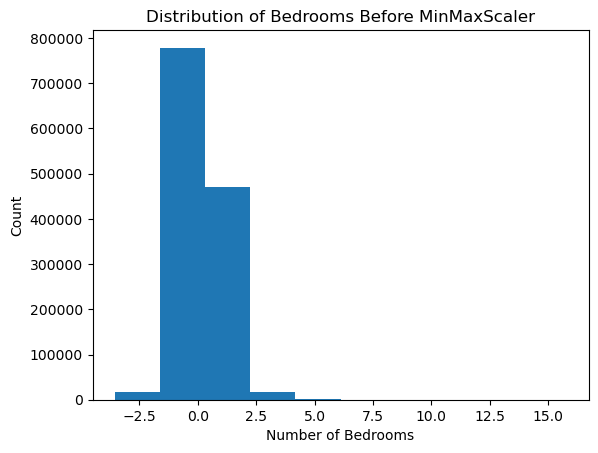

In [34]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

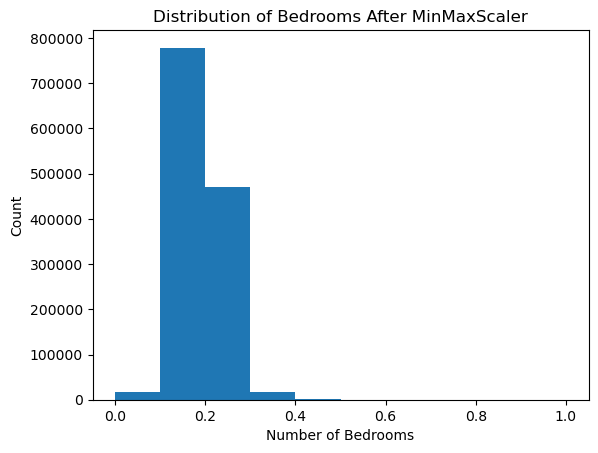

In [35]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [36]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()


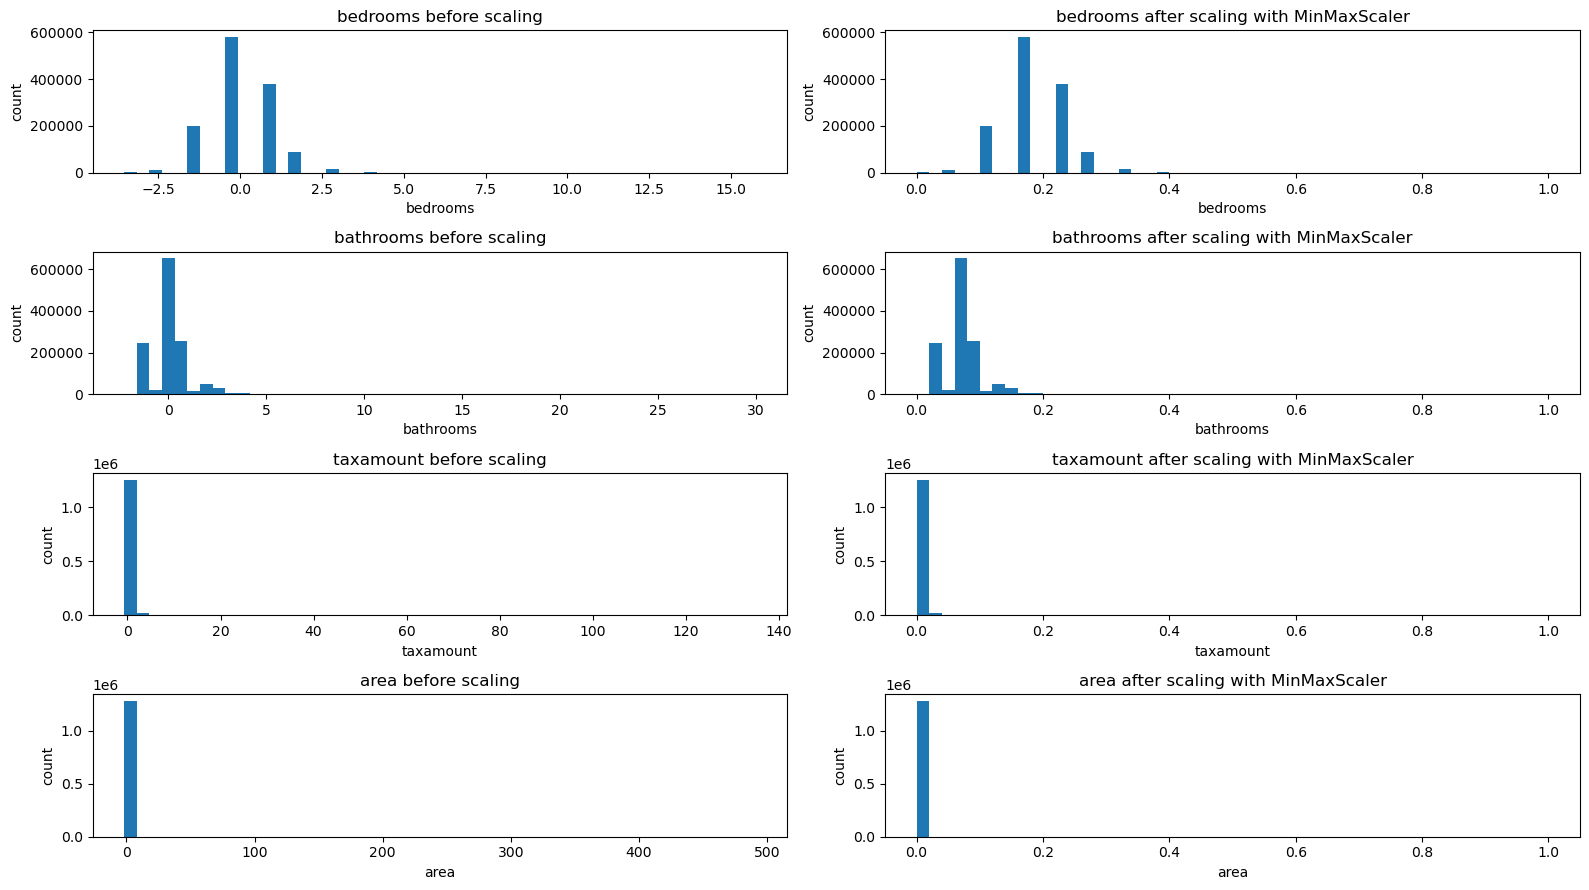

In [37]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

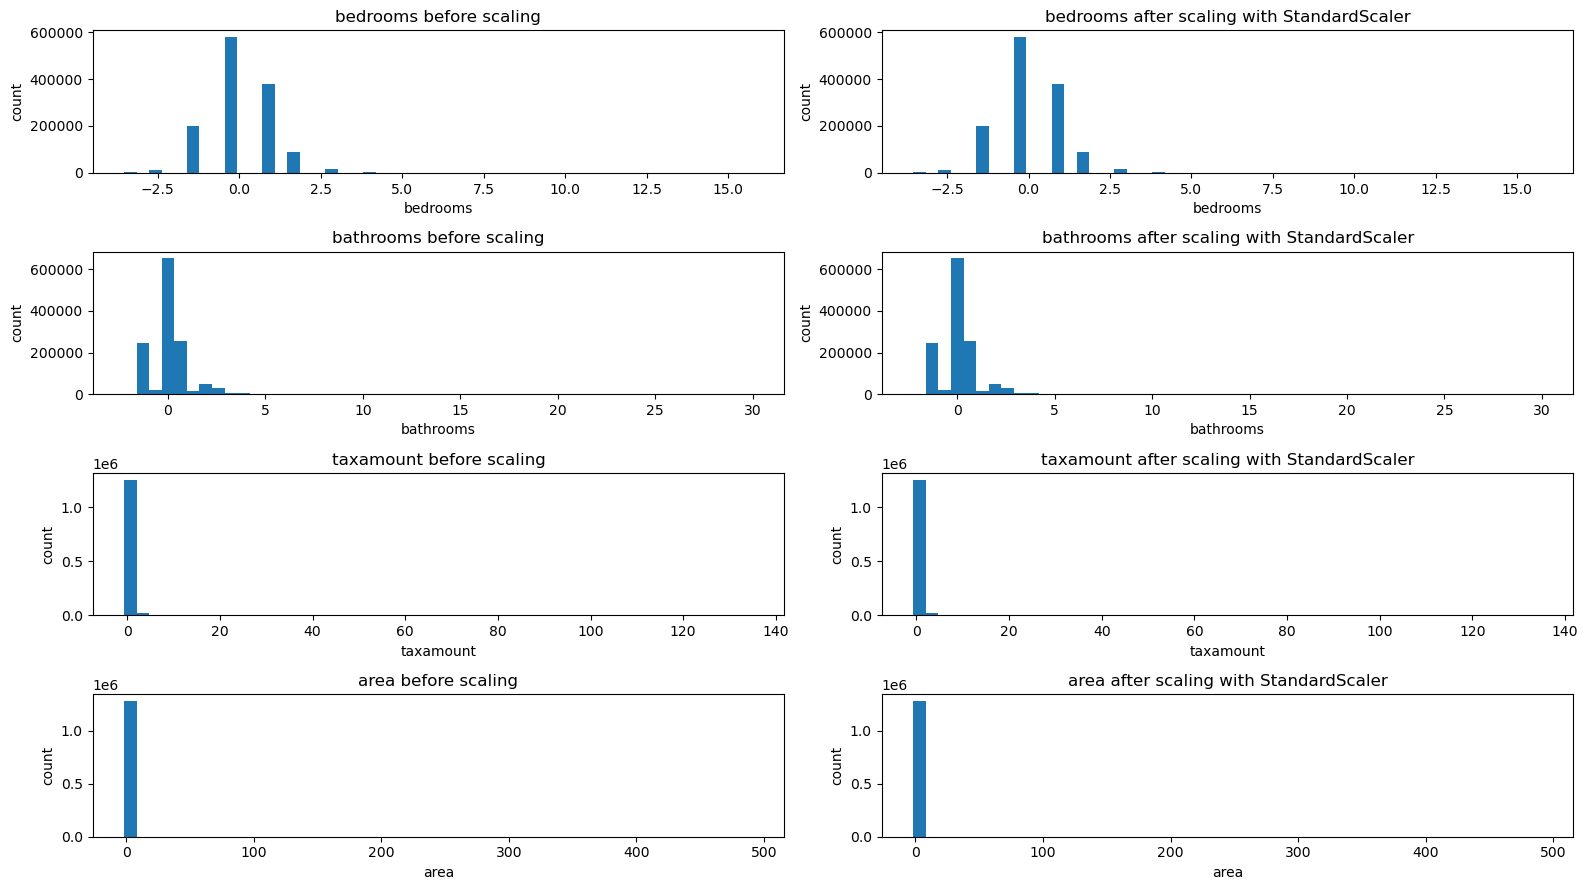

In [38]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

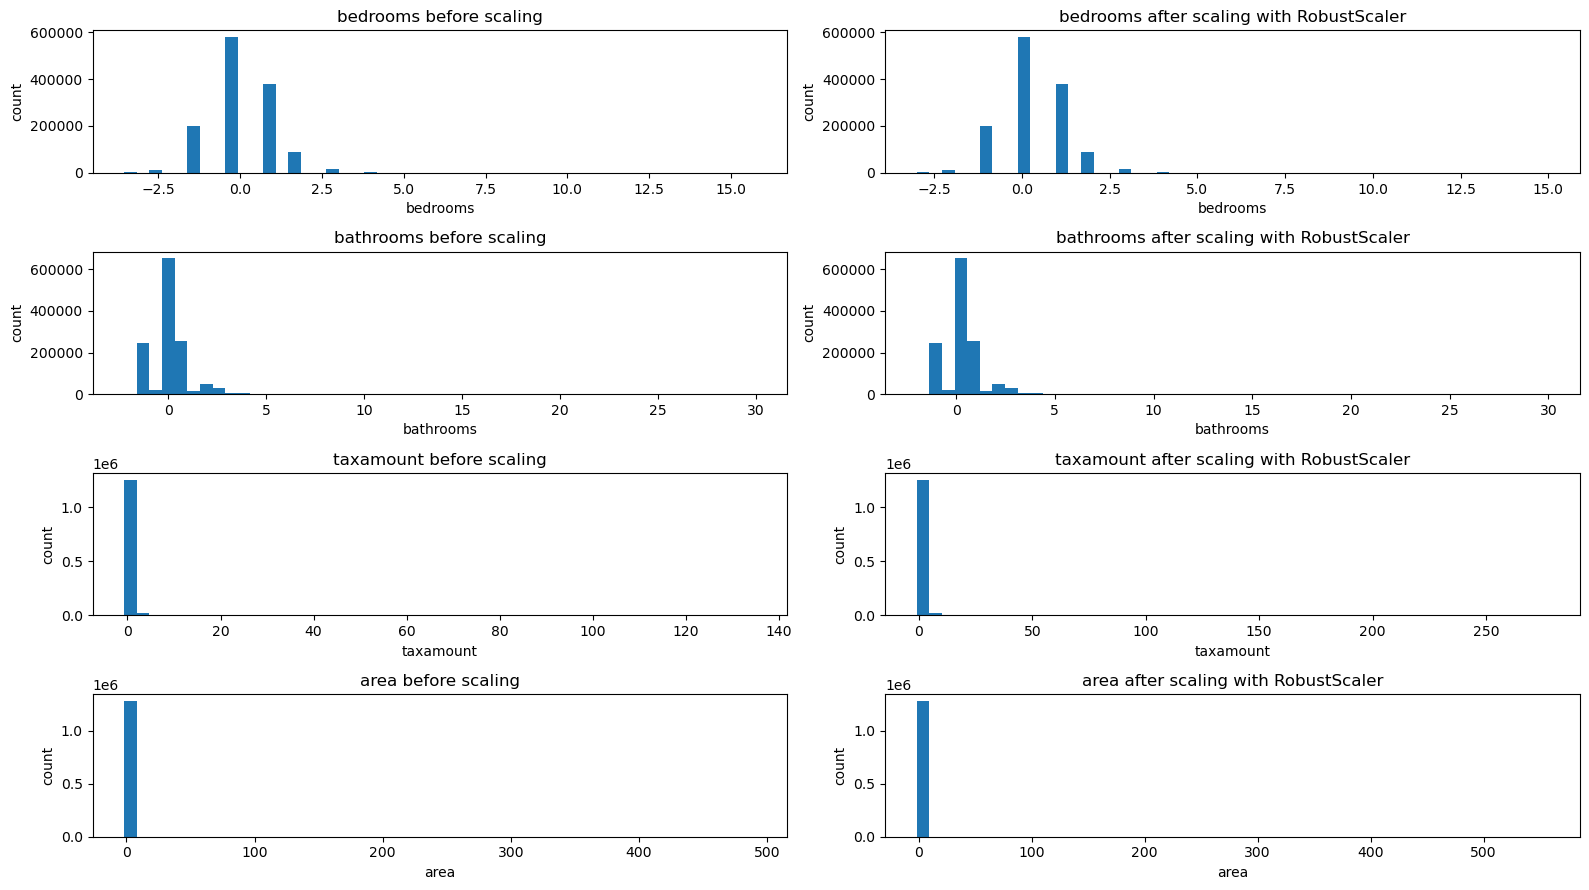

In [39]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [40]:
scaler = MinMaxScaler()
original_data = train[['taxamount']]
scaled_data = scaler.fit_transform(original_data)

In [41]:
scaled_data[:5]

array([[0.00700108],
       [0.00656053],
       [0.00104024],
       [0.00386013],
       [0.00658541]])

In [42]:
original_data[:5]

,taxamount
462820,0.244396
3880,0.184603
992263,-0.564629
311722,-0.181904
787985,0.187981


In [43]:
scaler.inverse_transform(scaled_data)[:5]

array([[ 0.24439564],
       [ 0.18460296],
       [-0.56462907],
       [-0.18190431],
       [ 0.18798066]])

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
From sklearn.preprocessing.QuantileTransformer documentation:

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

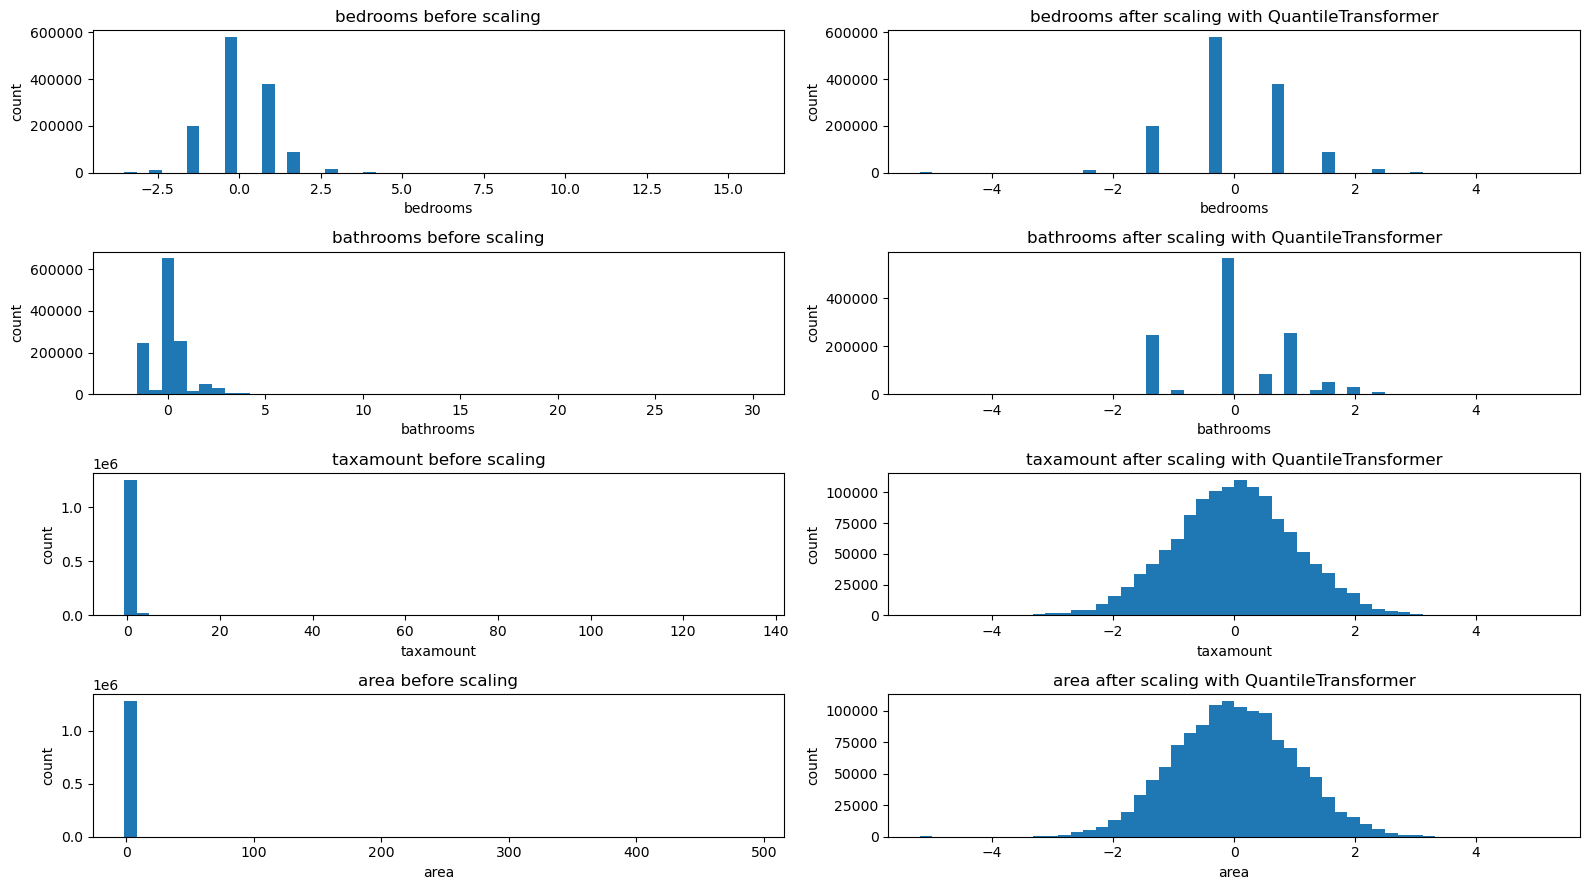

In [48]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your wrangle.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each.
Creating a Pipeline Function

In [49]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'tax_amount', 'sq_feet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [50]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

KeyError: "['tax_amount', 'sq_feet'] not in index"

In [51]:
scaler

MinMaxScaler()